# Module 4 & 5 - Classification

## Notes
- 1 December 2021: Ran successfully most cases.

In [2]:
import numpy as np
import math
import os
import pandas as pd
import matplotlib.pyplot as plt
import pydotplus 

from sklearn import tree
from scipy import stats
from IPython.display import Image

Gini coefficient @ $v_{i}$:

Gini coefficient $\in [0,1]$

$G(v_{i}) = 1 - \displaystyle \sum_{j=1}^k p_{j}^{2}$

$Overall G = \displaystyle \sum_{i=1}^r \displaystyle \frac{n_{i}G(v_{i})}{n}$

Entropy coefficent $\in [0, log_{2}k]$

$E(v_{i}) = - \displaystyle \sum_{j=1}^k p_{j}log_{2}(p_{j})$

$Overall E = \displaystyle \sum_{i=1}^r \displaystyle \frac{n_{i}E(v_{i})}{n}$

Reference: Shannon Entropy

$H(X) = - \displaystyle \sum_{i=1}^n P(x_{i})log_{2}P(x_{i})$

- Both Gini & Entropy have strongest discriminant power when they approach zero (0).

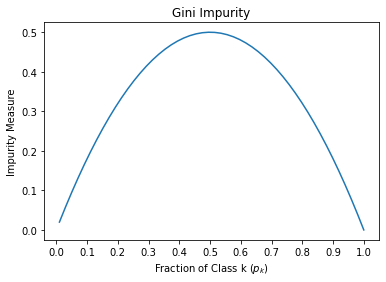

In [3]:
#A figure is created to show Gini ımpurity measures 
def plot_gini(x):
    plt.figure()
    # x = np.linspace(0.01,1)
    y = 1 - (x*x) - (1-x)*(1-x) 
    plt.plot(x,y)
    plt.title('Gini Impurity')
    plt.xlabel("Fraction of Class k ($p_k$)")
    plt.ylabel("Impurity Measure")
    plt.xticks(np.arange(0,1.1,0.1))

    plt.show()

plot_gini(np.linspace(0.01,1))    

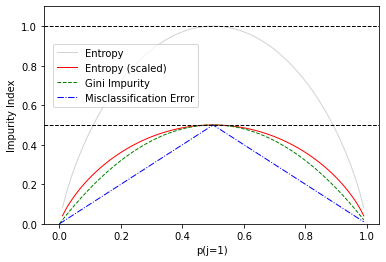

In [4]:
def gini(p):
   return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))

def entropy(p):
   return - p*np.log2(p) - (1 - p)*np.log2((1 - p))

def classification_error(p):
   return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
scaled_ent = [e*0.5 if e else None for e in ent]
c_err = [classification_error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)

for j, lab, ls, c, in zip(
      [ent, scaled_ent, gini(x), c_err],
      ['Entropy', 'Entropy (scaled)', 'Gini Impurity', 'Misclassification Error'],
      ['-', '-', '--', '-.'],
      ['lightgray', 'red', 'green', 'blue']):
   line = ax.plot(x, j, label=lab, linestyle=ls, lw=1, color=c)

ax.legend(loc='upper left', bbox_to_anchor=(0.01, 0.85),
         ncol=1, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')

plt.ylim([0, 1.1])
plt.xlabel('p(j=1)')
plt.ylabel('Impurity Index')
plt.show()

# Excersise code begins ...

In [5]:
def gini_impurity (value_counts):
    n = value_counts.sum()
    gini = 1
    
    if len(value_counts) == n:
        return 0
    
    for key in value_counts.keys():
        pj = value_counts[key]/n
        gini -= (pj)**2    
        
    return gini

def entropy(value_counts):
    entropy = 0
    for key in value_counts.keys():
        pj = value_counts[key]/n
        entropy += pj*math.log(pj,2)
    return -entropy

In [6]:
def get_gini_by_classes(dfs, feat_name, feat_unique_values, n):
    props = {}
    counts = {}
    for value in feat_unique_values:
        counts [value] = 0
        for key in dfs:
            df = dfs[key]
            if value not in props:
                props[value] = []
            props[value].append(len(df[df[feat_name] == value]))
            counts[value] += len(df[df[feat_name] == value])
            
    ginis = {}
    overall_g = 0
    for key in props:
        g = 1
        for val in props[key]:
            pj = val/sum(props[key])
            g -= pj**2
        ginis[key] = g
        ni = counts[key]
        overall_g += g*ni/n
    return ginis, overall_g

import math

def get_entropy(df, label_name):
    
    label_values = df[label_name].unique()
    counts = {}
    n = len(df)
    
    for val in label_values:
        counts[val] = len(df[df[label_name] == val])
#     print(label_values)
#     print(counts)
    
    e = 0
    for key in counts:
        val = counts[key]
        pj = val/n
        e -= pj*math.log(pj,2)
#     print(round(e,4))
    
    return e, counts

# information gain
def get_ig(df, label_name, feat_name):
    e, counts = get_entropy(df, label_name)
    feat_unique_values = df[feat_name].unique()    
    
    counts = {}
    n = len(df)
    
    for val in feat_values:
        counts[val] = len(df[df[feat_name] == val])
    
    dfs = {}
    for cls in classes:
        dfs[cls] = df[df[label_name] == cls]
    feat_props = {}
    feat_counts = {}
    for value in feat_unique_values:
        feat_counts [value] = 0
        for key in dfs:
            df = dfs[key]
            if value not in feat_props:
                feat_props[value] = []
            feat_props[value].append(len(df[df[feat_name] == value]))
            feat_counts[value] += len(df[df[feat_name] == value])
    
    print('feat_unique_values', feat_unique_values)
    print('feat_counts', feat_counts)
    e_split = 0
    for key in feat_counts:
        pi = feat_counts[key]/n
        ei = 0
        for count in feat_props[key]:                
            pj = count/sum(feat_props[key])
            if pj > 0:
                ei -= pj*math.log(pj,2)
            
        e_split += pi*ei
        print(f'{feat_counts[key]}: {e_split}')
    
    return e_split, e - e_split



# Banu Nallani Code Explanation

I use the Vertebrate dataset as an example to explain the gini index, entropy and information gain.

In [7]:
#df = pd.read_csv('/Users/bn/Documents/Artists.csv')


EX_3_2     = '/Users/bn/Data Engineering/ex-3_2.csv'
EX_3_3     = '/Users/bn/Data Engineering/ex-3_3.csv'
EX_3_6     = '/Users/bn/Data Engineering/ex-3_6.csv'
EX_3_EXTRA = '/Users/bn/Data Engineering/ex-3_extra.csv'
VERTEBRATE = '/Users/bn/Data Engineering/vertebrate.csv'
WEB_ROBOT  = '/Users/bn/Data Engineering/web-robot-detection.csv'
SOC_NET    = '../data/Social_Network_Ads.csv'

# filename = EX_3_2
# label_name = 'Class'
# dropped_features = ['CustomerID']

# filename = EX_3_3
# label_name = 'Target_Class'
# dropped_features = ['Instance', 'a3']

# *** This is a more complex case where you have 2 labels/dependent variables. ***
# *** Don't run decision tree on it as of yet ***
# filename = EX_3_6
# label_name = 'C1'
# dropped_features = []

# filename = EX_3_EXTRA
# label_name = 'default'
# dropped_features = []

filename = VERTEBRATE
label_name = 'Class'
dropped_features = ['Name']

# filename = WEB_ROBOT
# label_name = 'class'
# dropped_features = []

# filename = SOC_NET
# label_name = 'Purchased'
# dropped_features = ['User_ID']

df = pd.read_csv(filename)

df.style

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,birds
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,fishes


## *** Data Mapping for some data sets ***
### Begins

In [8]:
if filename == EX_3_2:
    gender = {'M': 1, 'F': 2}
    car_type = {'Family': 1, 'Sports': 2, 'Luxury': 3}
    shirt_size = {'Small': 1, 'Medium':2, 'Large': 3, 'Extra Large': 4} # Preserving the order: Small, Medium, Large, Extra Lage ...
    df = df.replace({'Gender': gender}).replace({'Car Type': car_type}).replace({'Shirt Size': shirt_size})
elif filename == EX_3_3:
    a1 = {'F': 0, 'T': 1}
    a2 = {'F': 0, 'T': 1}
    df = df.replace({'a1': a1}).replace({'a2': a2})
elif filename == EX_3_EXTRA:
    age = {'youth': 1, 'middle_age': 2, 'senior': 3}
    income = {'low': 1, 'medium': 2, 'high': 3}
    student = {'no': 0, 'yes': 1}
    credit_rate = {'fair': 1, 'excellent': 2}
    df = df.replace({'age': age}).replace({'income': income}).replace({'student': student}).replace({'credit_rate':credit_rate})
elif filename == WEB_ROBOT:
    class_values = {0: '0', 1:'1'}
    df = df.replace({'class': class_values})
elif filename == SOC_NET:
    gender = {'Male': 1, 'Female': 2}
    purchased = {0:'0', 1:'1'}
    df = df.replace({'Gender':gender}).replace({'Purchased': purchased})
df

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,birds
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,fishes


## *** Data Mapping***
### Ends

## *** FOR vertebrate.csv ONLY ***
### Begins

In [9]:
## For data set `vertebrate.csv`, we are binarization the columns as follows:
if filename == VERTEBRATE:
    df_old = df.copy(deep=True)
    df[label_name] = df[label_name].replace(['fishes','birds','amphibians','reptiles'],'non-mammals')
    df

In [10]:
if filename == VERTEBRATE:
    pd.crosstab([df['Warm-blooded'],df['Gives Birth']],df[label_name])

In [12]:
#display(classes)

## *** FOR vertebrate.csv ONLY ***
### Ends

## Compute Gini Index, Entropy & Information Gain (IG)

# Gini Index
    
    

Gini index/impurity is one part of the trio of Gini index, entropy and IG. 

In [13]:
## Splitting data set into multiple data sets by values of the `label`.

classes = df[label_name].unique()
feat_list = df.columns.to_list()
feat_list.remove(label_name)

n = len(df)
dfs_by_classes = {}
for cls in classes:
    dfs_by_classes[cls] = df[df[label_name] == cls]

df_gini_output = pd.DataFrame()
dfs = []
for feat_name in feat_list:
    print(f'\n***{feat_name}***\n')
    feat_values = df[feat_name].unique()
    ginis, overall_g = get_gini_by_classes(dfs_by_classes, feat_name, feat_values, n)
    print('ginis:', ginis)
    print('overall G:', overall_g)
    dfs.append(pd.DataFrame([feat_name, ginis, overall_g]).transpose())    

df_gini_output = pd.concat(dfs)
df_gini_output.columns = ['Feature', 'G(vi)', 'G(S)']
display(df_gini_output)


***Name***

ginis: {'human': 0.0, 'python': 0.0, 'salmon': 0.0, 'whale': 0.0, 'frog': 0.0, 'komodo': 0.0, 'bat': 0.0, 'pigeon': 0.0, 'cat': 0.0, 'leopard shark': 0.0, 'turtle': 0.0, 'penguin': 0.0, 'porcupine': 0.0, 'eel': 0.0, 'salamander': 0.0}
overall G: 0.0

***Warm-blooded***

ginis: {1: 0.40816326530612246, 0: 0.0}
overall G: 0.1904761904761905

***Gives Birth***

ginis: {1: 0.2777777777777777, 0: 0.0}
overall G: 0.11111111111111108

***Aquatic Creature***

ginis: {0: 0.48979591836734704, 1: 0.21875}
overall G: 0.3452380952380953

***Aerial Creature***

ginis: {0: 0.4260355029585799, 1: 0.5}
overall G: 0.43589743589743585

***Has Legs***

ginis: {1: 0.48, 0: 0.31999999999999984}
overall G: 0.42666666666666664

***Hibernates***

ginis: {0: 0.4200000000000001, 1: 0.48}
overall G: 0.44000000000000006


,Feature,G(vi),G(S)
0,Name,"{'human': 0.0, 'python': 0.0, 'salmon': 0.0, '...",0.0
0,Warm-blooded,"{1: 0.40816326530612246, 0: 0.0}",0.190476
0,Gives Birth,"{1: 0.2777777777777777, 0: 0.0}",0.111111
0,Aquatic Creature,"{0: 0.48979591836734704, 1: 0.21875}",0.345238
0,Aerial Creature,"{0: 0.4260355029585799, 1: 0.5}",0.435897
0,Has Legs,"{1: 0.48, 0: 0.31999999999999984}",0.426667
0,Hibernates,"{0: 0.4200000000000001, 1: 0.48}",0.44


In [14]:
e, counts = get_entropy(df, label_name)
print(f'E(S) = {round(e,4)}')
print('counts:', counts)


E(S) = 0.9183
counts: {'mammals': 5, 'non-mammals': 10}


In [15]:
for feat_name in df_gini_output['Feature']:
    print (f'\n---> IG for {feat_name}')
    e_split, ig = get_ig(df, label_name, feat_name)
    print(f'{feat_name}: e_split = {round(e_split,4)} & ig = {round(ig,4)}')
    



---> IG for Name
feat_unique_values ['human' 'python' 'salmon' 'whale' 'frog' 'komodo' 'bat' 'pigeon' 'cat'
 'leopard shark' 'turtle' 'penguin' 'porcupine' 'eel' 'salamander']
feat_counts {'human': 1, 'python': 1, 'salmon': 1, 'whale': 1, 'frog': 1, 'komodo': 1, 'bat': 1, 'pigeon': 1, 'cat': 1, 'leopard shark': 1, 'turtle': 1, 'penguin': 1, 'porcupine': 1, 'eel': 1, 'salamander': 1}
1: 0.0
1: 0.0
1: 0.0
1: 0.0
1: 0.0
1: 0.0
1: 0.0
1: 0.0
1: 0.0
1: 0.0
1: 0.0
1: 0.0
1: 0.0
1: 0.0
1: 0.0
Name: e_split = 0.0 & ig = 0.9183

---> IG for Warm-blooded
feat_unique_values [1 0]
feat_counts {1: 7, 0: 8}
7: 0.4027895986644278
8: 0.4027895986644278
Warm-blooded: e_split = 0.4028 & ig = 0.5155

---> IG for Gives Birth
feat_unique_values [1 0]
feat_counts {1: 6, 0: 9}
6: 0.26000896865934164
9: 0.26000896865934164
Gives Birth: e_split = 0.26 & ig = 0.6583

---> IG for Aquatic Creature
feat_unique_values [0 1]
feat_counts {0: 7, 1: 8}
7: 0.4597731301493174
8: 0.7496741665224356
Aquatic Creature: e_sp

# Decision Trees ***
## Gini Coefficient

In [16]:
Y = df[label_name]
X = df.drop(dropped_features + [label_name], axis=1)
    
depth = 3
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=depth) # gini, entropy
clf = clf.fit(X, Y)

In [17]:
class_names = df[label_name].unique()
class_names

array(['mammals', 'non-mammals'], dtype=object)

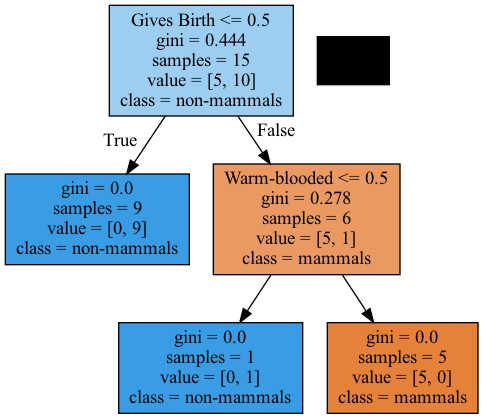

In [18]:
import os     

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

class_names = df[label_name].unique()
dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=class_names, filled=True, 
                                out_file=None) 
graph = pydotplus.graphviz.graph_from_dot_data(dot_data)

graph

#Image.open(graph)
Image(graph.create_png())

# Decision Tree *** for vertebrate.csv data set ***
## Gini Coefficient

In [19]:
Y = df[label_name]
X = df.drop(dropped_features + [label_name], axis=1)

depth = 5
clf = tree.DecisionTreeClassifier(criterion='gini',max_depth=depth) # gini, entropy
clf = clf.fit(X, Y)
# display(X)
# display(Y)

## Graph the Tree


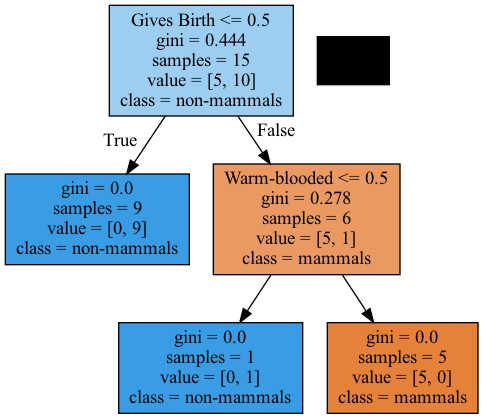

In [20]:
dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=class_names, filled=True, 
                                out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

## Entropy

In [21]:
Y = df[label_name]
X = df.drop(dropped_features + [label_name], axis=1)

depth = 5
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=depth) # gini, entropy
clf = clf.fit(X, Y)

## Graph the tree

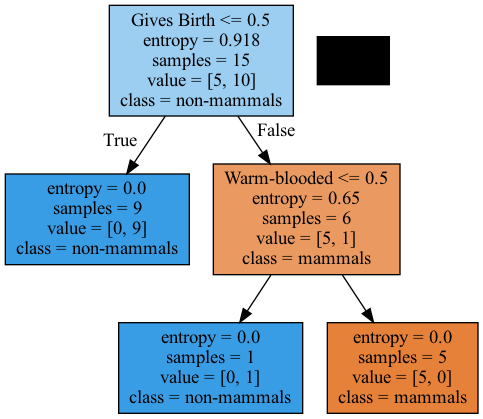

In [22]:
dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=class_names, filled=True, 
                                out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

## Testing the classifier


In [23]:
test_data = []
if filename == VERTEBRATE:    
    test_data = [['gila monster',0,0,0,0,1,1,'non-mammals'],
               ['platypus',1,0,0,0,1,1,'mammals'],
               ['owl',1,0,0,1,1,0,'non-mammals'],
               ['dolphin',1,1,1,0,0,0,'mammals']]
    df_test_data = pd.DataFrame(test_data, columns=df.columns)
    df_test_data
    
test_data

[['gila monster', 0, 0, 0, 0, 1, 1, 'non-mammals'],
 ['platypus', 1, 0, 0, 0, 1, 1, 'mammals'],
 ['owl', 1, 0, 0, 1, 1, 0, 'non-mammals'],
 ['dolphin', 1, 1, 1, 0, 0, 0, 'mammals']]

## Making Prediction on test data.

In [24]:
if test_data:
    testY = df_test_data[label_name]
    testX = df_test_data.drop(dropped_features + [label_name], axis=1)
    predY = clf.predict(testX)
    predictions = pd.concat([df_test_data['Name'],pd.Series(predY,name='Predicted Class')], axis=1)
    display(predictions.style.hide_index())

Name,Predicted Class
gila monster,non-mammals
platypus,non-mammals
owl,non-mammals
dolphin,mammals


In [25]:
from sklearn.metrics import accuracy_score

if test_data:
    print('Accuracy on test data is %.2f' % (accuracy_score(testY, predY)))

Accuracy on test data is 0.75


# Scratched papers

## Reference
`https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py`
    

In [26]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


In [73]:
iris = load_iris()
X = iris.data
y = iris.target

# official sklearn documentation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=42) 

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


IRIS DATASET

In [48]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

TRAIN TARGET

In [49]:
y_train

array([0, 2, 1, 0, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 2, 2, 0, 1, 0,
       2, 0, 1, 2, 2, 0, 2, 0, 0, 1, 1, 0, 2, 2, 1, 1, 2, 1, 0, 1, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 1, 2, 1, 0, 2, 1, 2, 0, 2, 0, 1, 2, 0, 1, 1,
       2, 1, 1, 2, 0, 0, 0, 2, 1, 2, 1, 2, 2, 1, 0, 2, 1, 0, 2, 0, 2, 1,
       1, 0, 1, 2, 0, 0, 2, 2, 2, 1, 2, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1,
       0, 2, 1, 1, 0, 0, 0, 0, 1, 0])

TEST TARGET

In [50]:
y_test

array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2,
       1, 2, 2, 1, 1, 0, 2, 0])

TRAIN/TEST TARGET SPLIT

In [74]:
list = {"Target": y,"Train Target": y_train,"Test Target": y_test}
for key,value in list.items():
    unique, counts = np.unique(value, return_counts=True)
    print(key,dict(zip(unique, counts)))    

Target {0: 50, 1: 50, 2: 50}
Train Target {0: 40, 1: 40, 2: 40}
Test Target {0: 10, 1: 10, 2: 10}


DECISION TREE CLASSIFIER

In [72]:
clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)

PREDICTION

In [75]:
y_pred = clf.predict(X_test)

METRICS: CONFUSION MATRIX & ACCURACY

In [76]:
# official sklearn documentation
from sklearn.metrics import classification_report, confusion_matrix
print("CONFUSION MATRIX \n", confusion_matrix(y_test, y_pred))
print("\n CLASSIFICATION REPORT \n",classification_report(y_test, y_pred))

CONFUSION MATRIX 
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]

 CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



METRICS: ERROR RATE

In [77]:
from sklearn.metrics import zero_one_loss
print("Zero One Loss", zero_one_loss(y_test, y_pred))

Zero One Loss 0.06666666666666665


In [30]:
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node.".format(
                space=node_depth[i] * "\t", node=i
            )
        )
    else:
        print(
            "{space}node={node} is a split node: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
            )
        )


The binary tree structure has 5 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 3] <= 0.800000011920929 else to node 2.
	node=1 is a leaf node.
	node=2 is a split node: go to node 3 if X[:, 3] <= 1.6500000357627869 else to node 4.
		node=3 is a leaf node.
		node=4 is a leaf node.


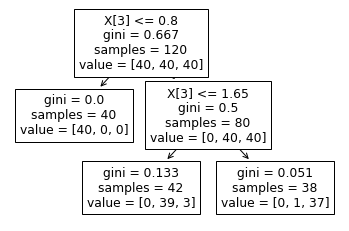

In [31]:
tree.plot_tree(clf)
plt.show()

In [32]:
node_indicator = clf.decision_path(X_test)
leaf_id = clf.apply(X_test)

sample_id = 0
# obtain ids of the nodes `sample_id` goes through, i.e., row `sample_id`
node_index = node_indicator.indices[
    node_indicator.indptr[sample_id] : node_indicator.indptr[sample_id + 1]
]

print("Rules used to predict sample {id}:\n".format(id=sample_id))
for node_id in node_index:
    # continue to the next node if it is a leaf node
    if leaf_id[sample_id] == node_id:
        continue

    # check if value of the split feature for sample 0 is below threshold
    if X_test[sample_id, feature[node_id]] <= threshold[node_id]:
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print(
        "decision node {node} : (X_test[{sample}, {feature}] = {value}) "
        "{inequality} {threshold})".format(
            node=node_id,
            sample=sample_id,
            feature=feature[node_id],
            value=X_test[sample_id, feature[node_id]],
            inequality=threshold_sign,
            threshold=threshold[node_id],
        )
    )

Rules used to predict sample 0:

decision node 0 : (X_test[0, 3] = 0.2) <= 0.800000011920929)


In [33]:
sample_ids = [0, 1]
# boolean array indicating the nodes both samples go through
common_nodes = node_indicator.toarray()[sample_ids].sum(axis=0) == len(sample_ids)
# obtain node ids using position in array
common_node_id = np.arange(n_nodes)[common_nodes]

print(
    "\nThe following samples {samples} share the node(s) {nodes} in the tree.".format(
        samples=sample_ids, nodes=common_node_id
    )
)
print("This is {prop}% of all nodes.".format(prop=100 * len(common_node_id) / n_nodes))


The following samples [0, 1] share the node(s) [0] in the tree.
This is 20.0% of all nodes.


## Section 3.5.3 Web Robot

In [34]:
err_tl = 4/24 + 0.5*7/24
err_tl

0.3125